### matplotlib 차트 유형

* histogram
* bar plot
* scatter plot
* line plot
* box plot
* pie chart

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "C:\\Users\\Playdata\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Pretendard-Regular.otf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

#### Histogram
* 연속형 값을 일정 구간을 나누어 구간별 데이터포인트의 빈도를 시각화
    * x축:연속형 데이터
    * y축:구간별 데이터포인트의 개수(합)

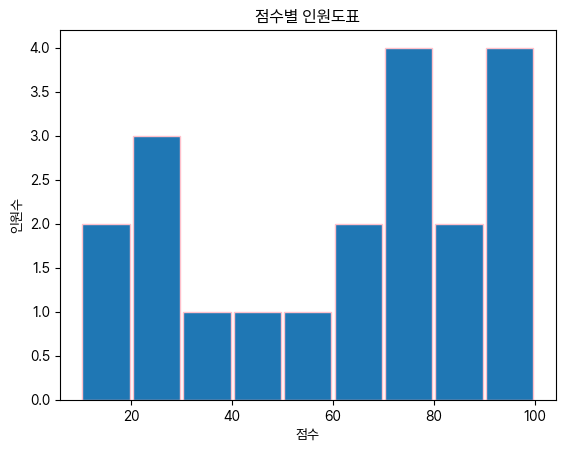

In [10]:
scores = [100, 80, 34, 16, 88, 25, 18, 46, 74, 57, 95, 96, 100, 63, 73, 74, 74, 25, 27, 66]

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.hist(scores, bins=bins, edgecolor='pink', rwidth=0.94)
# bins : 나눌 구간의 갯수
# edgecolor : 히스토그램 막대의 경계선 색상
# rwidth: 0-1사이로 막대의 간격 설정
plt.xlabel('점수')
plt.ylabel('인원수')
plt.title("점수별 인원도표")
plt.show()

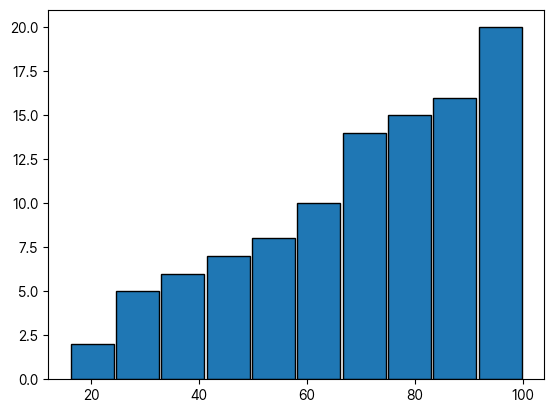

In [11]:
plt.hist(scores, edgecolor='black', rwidth=0.95, cumulative=True)
# cumulative : 누적 값
plt.show()

In [19]:
df = pd.read_csv('../02_pandas/data/crypto_daily_returns.csv')
df

,Date,BTC,ETH,LTC
0,9/17/2014,0.000000,0.000000,0.000000
1,9/18/2014,-7.192558,NaN,-7.379983
2,9/19/2014,-6.984264,NaN,-7.629499
3,9/20/2014,3.573492,NaN,-0.955003
4,9/21/2014,-2.465854,NaN,-0.945300
...,...,...,...,...
2380,3/28/2021,-0.040672,-1.464535,0.107149
2381,3/29/2021,3.216138,7.587343,5.105316
2382,3/30/2021,2.021625,1.447984,1.135017
2383,3/31/2021,0.001936,3.918042,0.415392


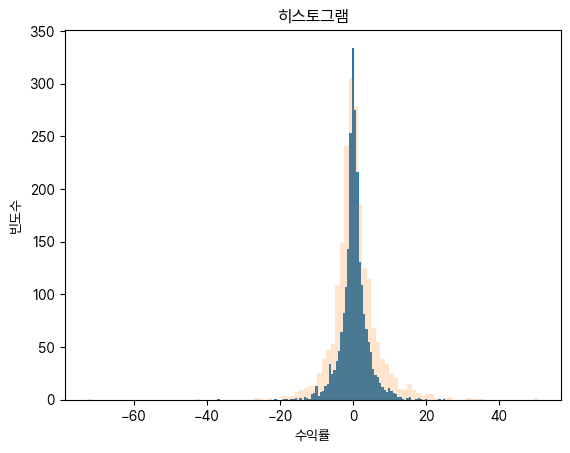

In [23]:
plt.hist(df['BTC'], bins = 100, label = 'BTC')
plt.hist(df['ETH'], bins = 100, label = 'ETH', alpha = 0.2)
plt.xlabel('수익률')
plt.ylabel('빈도수')
plt.title("히스토그램")
plt.show()

### Bar Plot
-막대 차트
- 범주형 데이터와 연속형 데이터의 관계를 시각화
    - x축 : 범주형 데이터 카테고리
    - y축 : 연속형 데이터(총합, 평균)

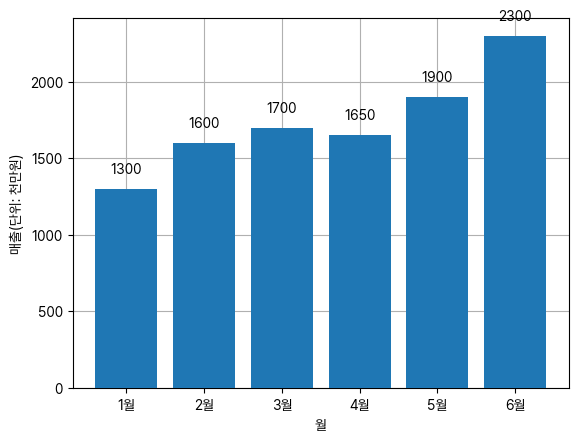

In [30]:
# 월별 매출 데이터
df = pd.DataFrame({
    'months' : ["1월", '2월', '3월', '4월', '5월', '6월'],
    'sales':[1300, 1600, 1700, 1650, 1900, 2300]
})

# zorder : z측 깊이 설정 (값이 클수록 앞으로 나옴)
plt.bar(df['months'], df['sales'], zorder=10)

for i, val in enumerate(df['sales']):
    # x축 위치, y축 위치, 텍스트, 텍스트 정렬(위치)
    plt.text(i, val + 100, str(val), ha='center')

plt.xlabel('월')
plt.ylabel('매출(단위: 천만원)')
plt.grid(zorder =1)
plt.show()

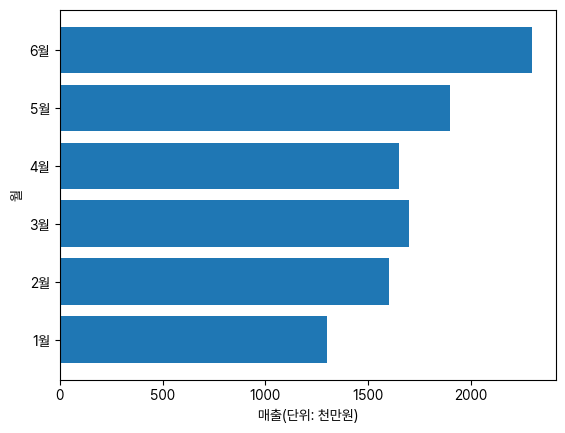

In [33]:
# 수평 막대그래프
# - x축: 연속형
# - y축: 범주형
plt.barh(df['months'], df['sales'])
plt.ylabel('월')
plt.xlabel('매출(단위: 천만원)')
plt.show()




In [50]:
df = pd.read_csv('../02_pandas/data/beers.csv')
df_1 = df.groupby('country')['beer_name'].count()
df_1

country
Belgium        4
Denmark        1
Germany        1
Ireland        1
Japan          2
Mexico         1
Netherlands    1
USA            1
Name: beer_name, dtype: int64

* 같은 그래프를 3가지 방식으로 그리기

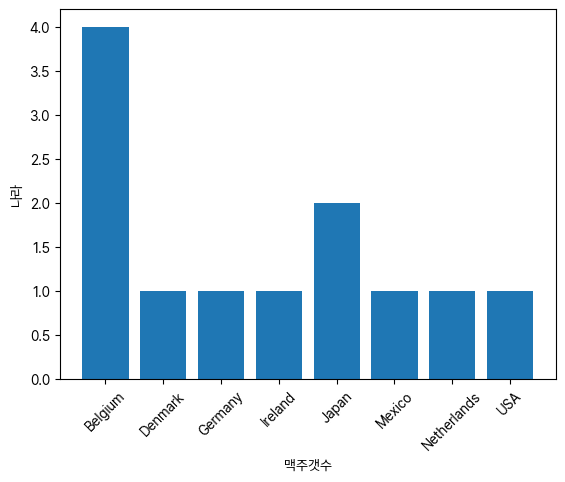

In [54]:
# 나라별 맥주의 갯수 시각화 - barchart

plt.bar(df_1.index, df_1.values)
plt.xticks(rotation = 45)
plt.ylabel('나라')
plt.xlabel('맥주갯수')
plt.show()

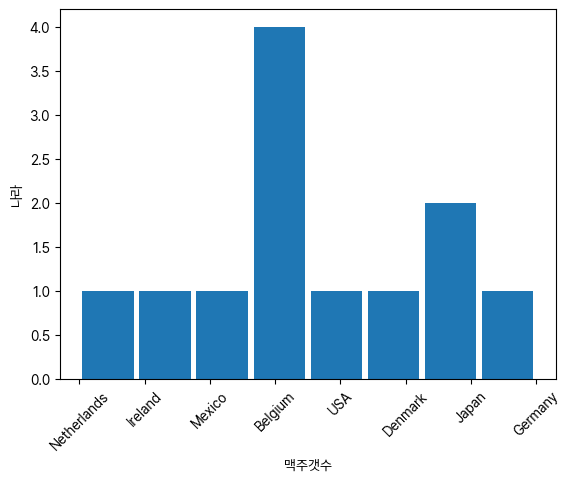

In [51]:
# 나라별 맥주의 갯수 시각화 - histogram
plt.hist(df['country'], bins=df['country'].nunique(), rwidth=0.9)
plt.xticks(rotation = 45)
plt.ylabel('나라')
plt.xlabel('맥주갯수')
plt.show()

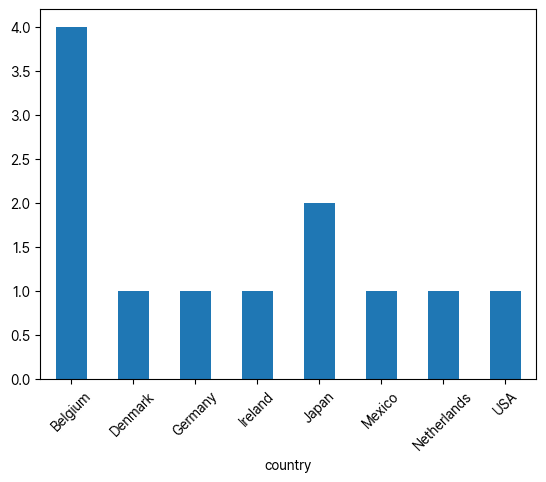

In [ ]:
# 나라별 맥주의 갯수 시각화 
df_1.plot(kind='bar')

plt.xticks(rotation=45)
plt.show()

#### line plot

* 시계열 데이터에서 변화하는 값의 추이를 시각화
    * x축 : 연속형 데이터
    * y축 : 연속형 데이터

In [62]:
# 주가 추이
df = pd.DataFrame({
    'Date': pd.date_range(start = '2025-01-01', periods = 15, freq='D'),
    'APPL': np.random.randint(100, 150, 15),
    'MSFT': np.random.randint(100, 150, 15)
})
df

,Date,APPL,MSFT
0,2025-01-01,121,113
1,2025-01-02,131,116
2,2025-01-03,142,113
3,2025-01-04,100,149
4,2025-01-05,108,139
5,2025-01-06,103,128
6,2025-01-07,103,100
7,2025-01-08,147,149
8,2025-01-09,103,101
9,2025-01-10,104,137


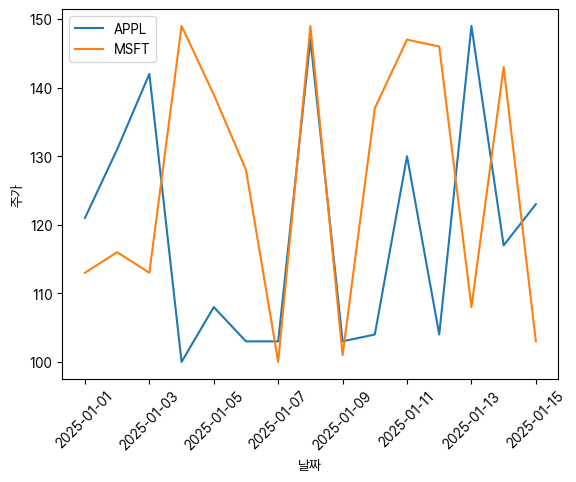

In [65]:
plt.plot(df['Date'], df['APPL'], label='APPL')
plt.plot(df['Date'], df['MSFT'], label='MSFT')

plt.xlabel('날짜')
plt.xticks(rotation = 45)
plt.ylabel('주가')
plt.legend()
plt.show()

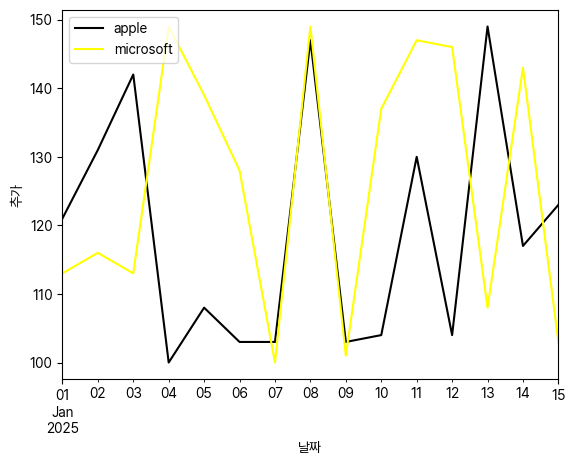

In [71]:
df.plot(
    x='Date',
    y=['APPL', 'MSFT'],
    color=['black', 'yellow'],
    label=['apple', 'microsoft']
)

plt.xlabel('날짜')
plt.ylabel('추가')
plt.show()

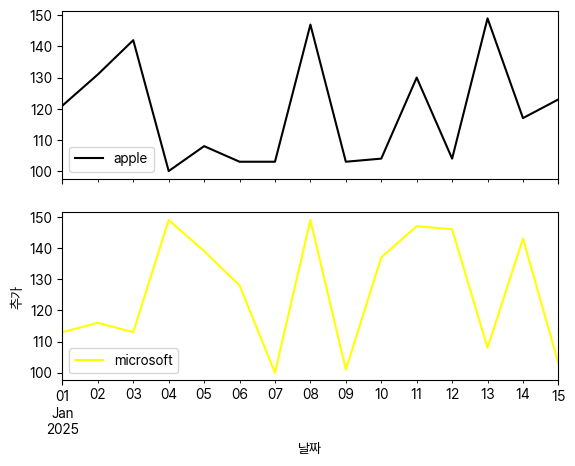

In [ ]:
df.plot(
    x='Date',
    y=['APPL', 'MSFT'],
    color=['black', 'yellow'],
    label=['apple', 'microsoft'],  #legend 설정하지 않아도 만들어짐
    subplots=True  #subplot 형태로 그림
)

plt.xlabel('날짜')
plt.ylabel('추가')
plt.show()

In [74]:
df = pd.read_csv('../02_pandas/data/crypto_daily_prices.csv')
df

,Date,BTC-USD Price,ETH-USD Price,LTC-USD Price
0,9/17/2014,457.334015,NaN,5.058550
1,9/18/2014,424.440002,NaN,4.685230
2,9/19/2014,394.795990,NaN,4.327770
3,9/20/2014,408.903992,NaN,4.286440
4,9/21/2014,398.821014,NaN,4.245920
...,...,...,...,...
2380,3/28/2021,55950.746090,1691.355957,185.028488
2381,3/29/2021,57750.199220,1819.684937,194.474777
2382,3/30/2021,58917.691410,1846.033691,196.682098
2383,3/31/2021,58918.832030,1918.362061,197.499100


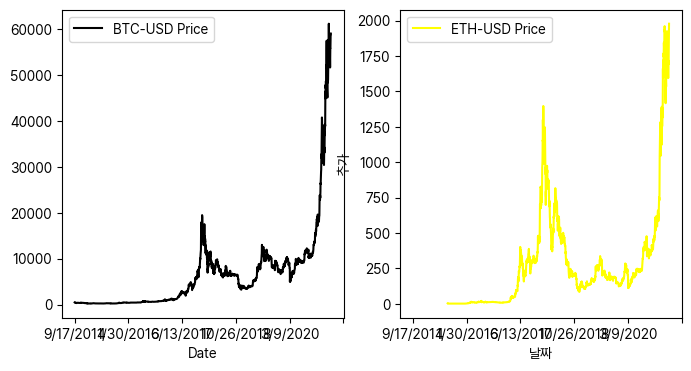

In [ ]:
# 코인 주가 추이
df.plot(
    x='Date',
    y=['BTC-USD Price', 'ETH-USD Price'],
    color=['black', 'yellow'],
    label=['BTC-USD Price', 'ETH-USD Price'],  #legend 설정하지 않아도 만들어짐
    subplots=True,  #subplot 형태로 그림
    layout=(1, 2),  # 1행 2열로 배치 (가로로 배치)
    figsize=(8, 4)  # 그래프 크기 설정
)

plt.xlabel('날짜')
plt.ylabel('추가')
plt.show()

### scatter plot

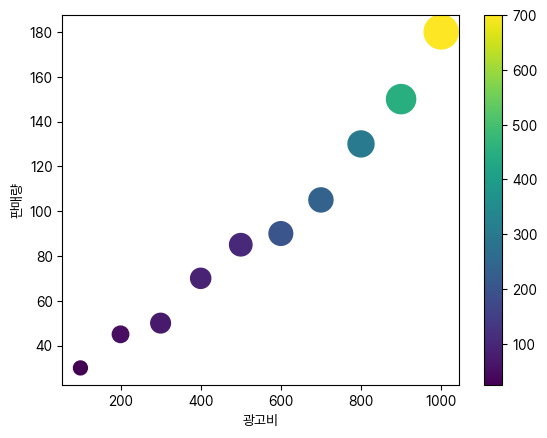

In [82]:
df = pd.DataFrame({
    'ad_budget': np.arange(100, 1001, 100), 
    'sales': [30, 45, 50, 70, 85, 90, 105, 130, 150, 180],
    'visitor': [100, 140, 200, 210, 260, 290, 300, 350, 440, 600],
    'colors': [25, 50, 70, 90, 100, 200, 235, 300, 450, 700]
})

# s:점의 크기, c:점의 색상(컬러 값으로 연속 데이터 표현)
plt.scatter(df['ad_budget'], df['sales'], s=df['visitor'], c=df['colors'])

plt.colorbar()

plt.xlabel('광고비')
plt.ylabel('판매량')
plt.show()

### pie chart

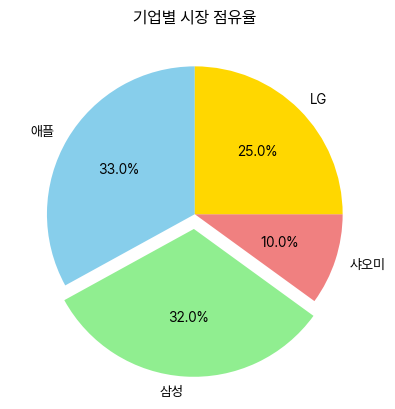

In [ ]:
df = pd.DataFrame({
    'label': ['애플', '삼성', '샤오미', 'LG'],
    'market_share': [33, 32, 10, 25], 
    'sales': [1345, 234, 545, 454],
    'explode': [0, 0.1, 0, 0]
})

plt.pie(
    df['market_share'],
    labels = df['label'],
    # 퍼센트 표시시
    autopct='%.1f%%',
    # 12시 방향에서 원 그래프가 시작
    startangle=90,
    # 떨어지는 형태의 그래프
    explode=df['explode'],
    colors=['skyblue', 'lightgreen', 'lightcoral', 'gold']
)

plt.title('기업별 시장 점유율')
plt.show()

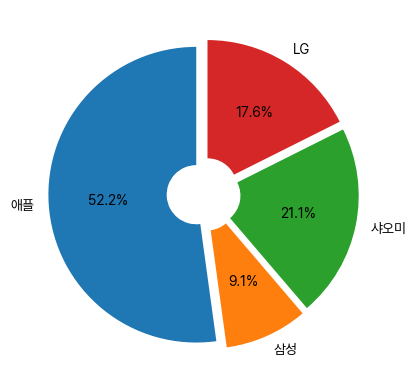

In [ ]:
plt.pie(
    df['sales'],
    labels=df['label'],
    autopct='%.1f%%',
    startangle=90,
    explode=[.05, .05, .05, .05],
    # 도넛 모양새를 주는 인자 (0-1사이)
    wedgeprops={'width': .8}
)

plt.text(0,0,'기업별 판매 비율', ha='center', va='center')

plt.show()

### box plot

- 연속형 데이터의 분포를 사분위수로 시각화
- 이상치 outlier를 도출하는 데에 효과적
    - x축:이산값(범주형) 데이터
    - y축:연속형 데이터

- 표현되는 값들
    - max, Q3, Q2, Q1, min:최대값, 3분위수(75%), 2분위수(50%, 중위값), 1분위수(25%), 최소값
    - IQR(inter-quatile-Range):사분범위

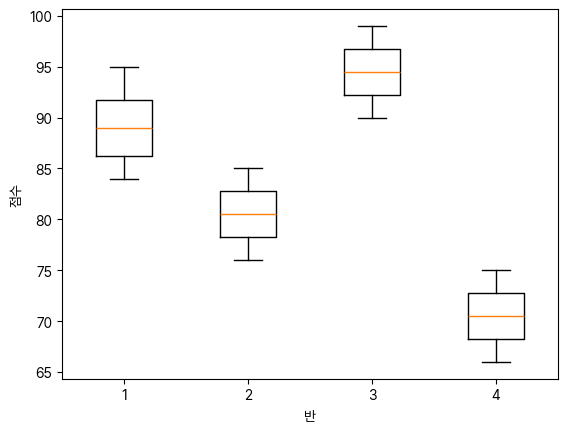

In [93]:
# 반별 시험 성적 데이터 (2차원 배열)
class_scores = [
    [85, 88, 90, 92, 93, 87, 95, 91, 84, 86],  # Class A
    [78, 82, 85, 80, 79, 84, 81, 83, 77, 76],  # Class B
    [92, 95, 96, 94, 90, 97, 93, 91, 98, 99],  # Class C
    [70, 72, 68, 75, 74, 69, 73, 71, 66, 67]   # Class D
]

plt.boxplot(class_scores)
plt.xlabel('반')
plt.ylabel('점수')
plt.show()

In [94]:
data = class_scores[0]

print('최소값:', np.min(data))
print('사분위수(Q1):', np.percentile(data, 25))
print('사분위수(Q2):', np.percentile(data, 50))
print('사분위수(Q3):', np.percentile(data,75))
print('최대값:', np.max(data))

최소값: 84
사분위수(Q1): 86.25
사분위수(Q2): 89.0
사분위수(Q3): 91.75
최대값: 95


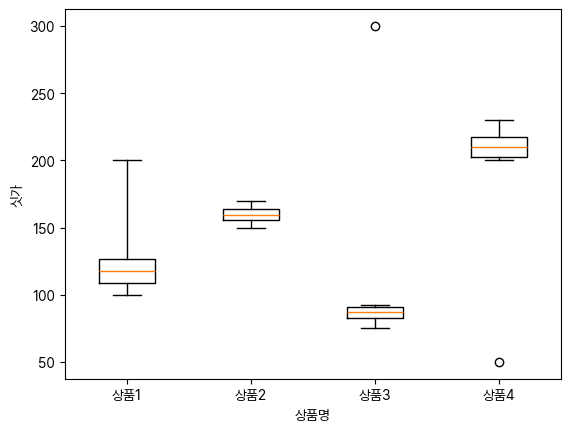

In [ ]:
weird_data = [
    [100, 120, 130, 110, 115, 105, 125, 200],
    [150, 160, 170, 155, 165, 158],
    [80, 85, 90, 75, 92, 87, 300],
    [200, 220, 210, 205, 215, 230, 50]
]

# whis 기본값 :  1.5
# [참고] 수염의 길이 계산 공식 : [Q1 - whis * IQR, Q3 + q.5 * IQR]
# [참고] IQR = Q3 - Q1
plt.boxplot(weird_data, whis=5)
plt.xticks([1,2,3,4], ['상품1', '상품2', '상품3', '상품4'])
plt.xlabel('상품명')
plt.ylabel('싯가')
plt.show()